In [247]:
# Duomenys
import numpy as np
import pandas as pd
import random

n = 100
bananas_plotis = np.random.normal(5, 2, n).tolist()
bananas_ilgis = np.random.normal(15, 2, n).tolist()
obuol_plotis = np.random.normal(7.5, 2, n).tolist()
obuol_ilgis = np.random.normal(7.5, 1, n).tolist()
isvestis_bananas = [1] * n
isvestis_obuol = [0] * n
duomenys = pd.DataFrame({'plotis':bananas_plotis+obuol_plotis, 'ilgis':bananas_ilgis+obuol_ilgis, 'isvestis': isvestis_bananas+isvestis_obuol})
X = duomenys[['plotis','ilgis']].values
Y = duomenys['isvestis'].values

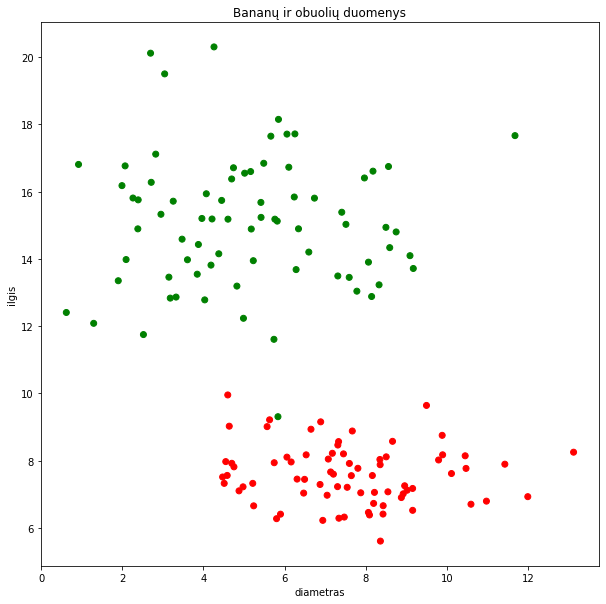

In [248]:
# Duomenų atvaizdavimas
import matplotlib
import matplotlib.pyplot as plt
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
fig = plt.figure(figsize=(10,10))
plt.scatter(duomenys['plotis'],duomenys['ilgis'], c=duomenys['isvestis'], cmap=my_cmap)
plt.xlabel('plotis')
plt.ylabel('ilgis')
plt.title('Bananų ir obuolių duomenys')
plt.show()

In [249]:
# Sigmoid
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# Perceptronas
def perceptron(x, w, b):
    w_sneezed = np.squeeze(np.asarray(w))
    return np.dot(x, w_sneezed) + b

# Gradientas svoriui
def grad_w (x, y, w, b):
    y_pred = sigmoid(perceptron(x, w, b))
    return (y_pred - y) * x

# Gradientas poslinkiui
def grad_b (x, y, w, b):
    y_pred = sigmoid(perceptron(x, w, b))
    return (y_pred - y)

In [263]:
# Neuroninis tinklas
from tqdm.notebook import tqdm
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from numpy import sqrt, asarray

def fit(X, Y, epochs=10, learning_rate=1, e = 0.1, algorithm = 'classic'):
    start_time = time.time()
    nuostolis = {}
    w_0 = [1.40564]
    w_1 = [-1.500917]
    nuostol = []
    #w = np.random.randn(1, X.shape[1])
    w = [[1.40564, -1.500917]]
    b = 0
    counter = 0
    change_w = 0.0
    change_b = 0.0
    momentum = 0.8
    sq_grad_sums_w = [0.0 for _ in range(2)]
    sq_grad_sums_b = [0.0 for _ in range(1)]
    rho = 0.9
    vdw = 0
    vdb = 0
    mdw = 0
    mdb = 0
    
    for counter in tqdm(range(epochs), total=epochs, unit="epoch"):
    #while(True): 
     #   counter += 1
        dw, db = 0, 0
        
        for x, y in zip(X, Y):
            dw += grad_w(x, y, w, b)
            db += grad_b(x, y, w, b)
        
        if algorithm == 'classic':
            w -= learning_rate * dw
            b -= learning_rate * db
        elif algorithm == 'momentum':
            new_change_w = learning_rate * dw + momentum * change_w
            w -= new_change_w
            change_w = new_change_w
            new_change_b = learning_rate * db + momentum * change_b
            b -= new_change_b
            change_b = new_change_b
        elif algorithm == 'adaptive':
            sq_grad_sums_w += dw**2
            w -= learning_rate / (1e-8 + sqrt(sq_grad_sums_w)) * dw
            sq_grad_sums_b += db**2
            b -= learning_rate / (1e-8 + sqrt(sq_grad_sums_b)) * db
        elif algorithm == 'rmsprop':
            vdw = rho * vdw + (1-rho) * dw**2
            w -= learning_rate / (1e-8 + sqrt(vdw)) * dw
            vdb = rho * vdb + (1-rho) * db**2
            b -= learning_rate / (1e-8 + sqrt(vdb)) * db
        elif algorithm == 'adam':
            mdw = momentum * mdw + (1 - momentum) * dw
            vdw = rho * vdw + (1 - rho) * dw**2
            mdw_hat = mdw / (1 - momentum**(counter+2))
            vdw_hat = vdw / (1 - rho**(counter+2))
            w -= learning_rate * mdw_hat / (1e-8 + sqrt(vdw_hat))
            mdb = momentum * mdb + (1 - momentum) * db
            vdb = rho * vdb + (1 - rho) * db**2
            mdb_hat = mdb / (1 - momentum**(counter+2))
            vdb_hat = vdb / (1 - rho**(counter+2))
            b -= learning_rate * mdb_hat / (1e-8 + sqrt(vdb_hat))
            
        w_0.append(w[0][0])
        w_1.append(w[0][1])
            
        Y_pred = sigmoid(perceptron(X, w, b))
        nuostolis[counter] = log_loss(Y, Y_pred)
        
        nuostol.append(nuostolis[counter])
        #if(nuostolis[counter] <= e):
        #    break
            
    print(f'Epochu skaicius: {counter+1}, Nuostolis: {nuostolis[counter]}')
    fig = plt.figure(figsize=(10,10))
    plt.plot(nuostolis.values())
    plt.xlabel('Epochos')
    plt.ylabel('Nuostolis')
    plt.show()
    
    return w, w_0, w_1, nuostol, b, time.time() - start_time

In [542]:
# Prognozė
def predict(X, w, b):
    Y_pred = []
    for x in X:
        y_pred = sigmoid(perceptron(x, w, b))
        Y_pred.append(y_pred)
    return np.array(Y_pred)

  0%|          | 0/1000 [00:00<?, ?epoch/s]

Epochu skaicius: 1000, Nuostolis: 4.869497029804636


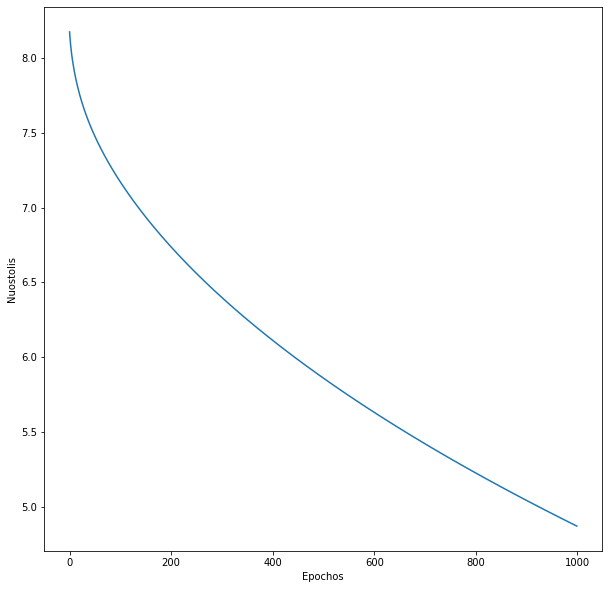

In [540]:
wc, w_0c, w_1c, nuostol_c, b, tc = fit(X, Y, epochs=1000, learning_rate=0.001, e = 0.01, algorithm = 'classic')
wm, w_0m, w_1m, nuostol_m, b, tm = fit(X, Y, epochs=1000, learning_rate=0.0001, e = 0.01, algorithm = 'momentum')
wa, w_0a, w_1a, nuostol_a, b, ta = fit(X, Y, epochs=1000, learning_rate=1, e = 0.01, algorithm = 'adaptive')
wr, w_0r, w_1r, nuostol_r, b, tr = fit(X, Y, epochs=1000, learning_rate=0.01, e = 0.01,algorithm = 'rmsprop')
wad, w_0ad, w_1ad, nuostol_ad, b, tad = fit(X, Y, epochs=1000, learning_rate=0.01, e = 0.01, algorithm = 'adam')

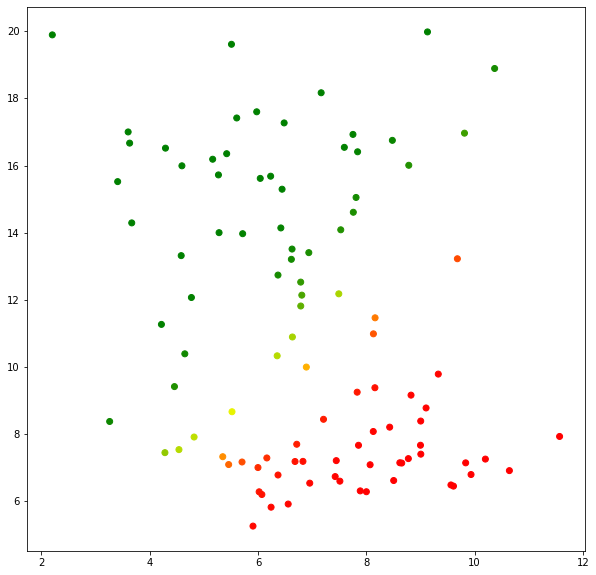

In [402]:
p = X
y_pred = predict(p, w, b)
df_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
df_pred['plotis'] = duomenys['plotis']
df_pred['ilgis'] = duomenys['ilgis']
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
fig = plt.figure(figsize=(10,10))
plt.scatter(df_pred['plotis'],df_pred['ilgis'], c=df_pred['y_pred'], cmap=my_cmap)
plt.show()

In [458]:
def log_cost(w, X, y):
    Y_pred = sigmoid(perceptron(X, w, b))
    nuostolis= log_loss(Y, Y_pred)
    return nuostolis

theta0_vals = np.arange(-5, 6, 0.01)
theta1_vals = np.arange(-5, 6, 0.01)
contours = np.array([log_cost([theta0,theta1],X,Y) 
                     for theta0 in theta0_vals 
                     for theta1 in theta1_vals]).reshape((theta0_vals.shape[0], theta1_vals.shape[0]))

1100 1100


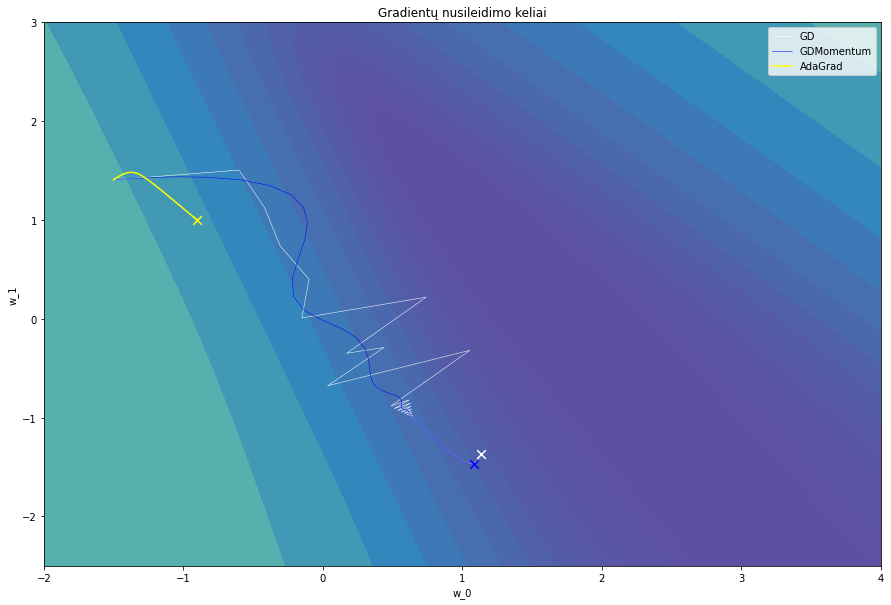

In [541]:
from numpy import ndarray

best_thetas = wc
fig = plt.figure(figsize=(15,10))
plt.contourf(theta0_vals, theta1_vals + best_thetas[0][1]+0.5, contours, 
             np.logspace(-5.0, 2, 60), cmap=plt.cm.Spectral_r)
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.xlim(-2, 4)
plt.ylim(-2.5, 3)
plt.scatter(wc[0][1], wc[0][0], zorder=3, color='white', marker='x', s=75)
plt.scatter(wm[0][1], wm[0][0], zorder=3, color='blue', marker='x', s=75)
plt.scatter(wa[0][1], wa[0][0], zorder=3, color='yellow', marker='x', s=75)
plt.scatter(wr[0][1], wr[0][0], zorder=3, color='orange', marker='x', s=75)
plt.scatter(wad[0][1], wad[0][0], zorder=3, color='red', marker='x', s=75)
plt.plot(w_1c, w_0c, linewidth=0.5, color='white', label = 'GD')
plt.plot(w_1m, w_0m, linewidth=0.5, color='blue', label = 'GDMomentum')
plt.plot(w_1a, w_0a, linewidth=1.5, color='yellow', label = 'AdaGrad')
plt.plot(w_1r, w_0r, linewidth=0.5, color='orange', label = 'RMSProp')
plt.plot(w_1ad, w_0ad, linewidth=1.5, color='red', label = 'Adam')
plt.title('Gradientų nusileidimo keliai')
plt.legend()
